<a href="https://colab.research.google.com/github/CharlesPrado23/Notebooks/blob/main/Node2Vec/node2Vec_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install node2vec

In [27]:
import networkx as nx
from node2vec import Node2Vec
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer

In [28]:
news = pd.read_csv('https://raw.githubusercontent.com/Currie32/Predicting-the-Dow-Jones-with-Headlines/master/News.csv')
text_total = news.News
text_total = text_total.reset_index(drop=True)

In [29]:
text_total.head()

0    A 117-year-old woman in Mexico City finally re...
1     IMF chief backs Athens as permanent Olympic host
2    The president of France says if Brexit won, so...
3    British Man Who Must Give Police 24 Hours' Not...
4    100+ Nobel laureates urge Greenpeace to stop o...
Name: News, dtype: object

In [30]:
text_total = text_total.iloc[0:200]

In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:

stemmer = SnowballStemmer("english")

In [33]:
# function to clean text
def review_to_words(raw_review):
    
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 3. Remove Stopwords. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]  #returns a list 
    # 5. Stem words. Need to define porter stemmer above
    singles = [stemmer.stem(word) for word in meaningful_words]
    
    # 7. remove remaining tokens that are not alphabetic
    singles = [word for word in singles if word.isalpha()]
    
    # 8. Join the words back into one string separated by space, and return the result.
    return( " ".join( singles ))


In [34]:
# apply it to our text data 
# dataset is named wine_data and the text are in the column "wmn"
processed_wmn = [ review_to_words(str(text)) for text in text_total]
print(processed_wmn[:5])

['year old woman mexico citi final receiv birth certif die hour later trinidad alvarez lira wait year proof born', 'imf chief back athen perman olymp host', 'presid franc say brexit donald trump', 'british man must give polic hour notic sex threaten hunger strike man subject sexual risk order despit never convict crime', 'nobel laureat urg greenpeac stop oppos gmos']


In [35]:
processed_words = " ".join(processed_wmn).split()

In [36]:
def transform_sentences_to_pair_of_words(sentences):
    list_of_pair_of_words = []
    for i in range(len(sentences)):
        buffer_pair_of_words = (sentences[i-1],sentences[i])
        list_of_pair_of_words.append(buffer_pair_of_words)
    del list_of_pair_of_words[0]
    return list_of_pair_of_words

In [37]:
sentences_to_pair = transform_sentences_to_pair_of_words(processed_words)

In [ ]:
sentences_to_pair

In [ ]:
G = nx.DiGraph()
G.add_edges_from(sentences_to_pair)
G = G.to_undirected()

In [ ]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [ ]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100, workers=2)

In [39]:
model = node2vec.fit(window=10, min_count=1)

In [41]:
for node, _ in model.most_similar('trump'):
  if len(node) > 3:
    print(node)

donald
british
caus
commission
politician
teenag
though
view
half


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [42]:
import numpy as np

player_nodes = [x for x in model.wv.vocab if len(x) > 3]
embeddings = np.array([model.wv[x] for x in player_nodes])

In [43]:
embeddings

array([[-0.38534456,  0.87595785, -0.23693566, ...,  0.29728732,
        -0.1645843 ,  0.45719105],
       [-0.6692357 ,  0.9347246 ,  0.48561287, ...,  0.3501023 ,
        -0.01169947,  0.83946   ],
       [-0.95126724,  1.0844522 ,  0.55239046, ...,  0.28386775,
         0.85979086,  1.0008383 ],
       ...,
       [-0.8422065 ,  0.64805037, -0.61254317, ...,  0.542341  ,
        -0.5222439 ,  0.11960356],
       [-1.6630439 ,  0.9194511 ,  0.46734682, ...,  0.37218615,
         2.2380402 , -0.21991706],
       [-0.35995966,  1.5390654 ,  0.49497762, ..., -0.09054228,
        -0.78521025,  0.07520396]], dtype=float32)

In [ ]:


def tsne_plot(model):
  "Creates and TSNE model and plots it"
  labels = []
  tokens = []

  for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(tokens)

  x = []
  y = []
  for value in new_values:
    x.append(value[0])
    y.append(value[1])

  plt.figure(figsize=(16, 16)) 
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
              xy=(x[i], y[i]),
              xytext=(5, 2),
              textcoords='offset points',
              ha='right',
              va='bottom')
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


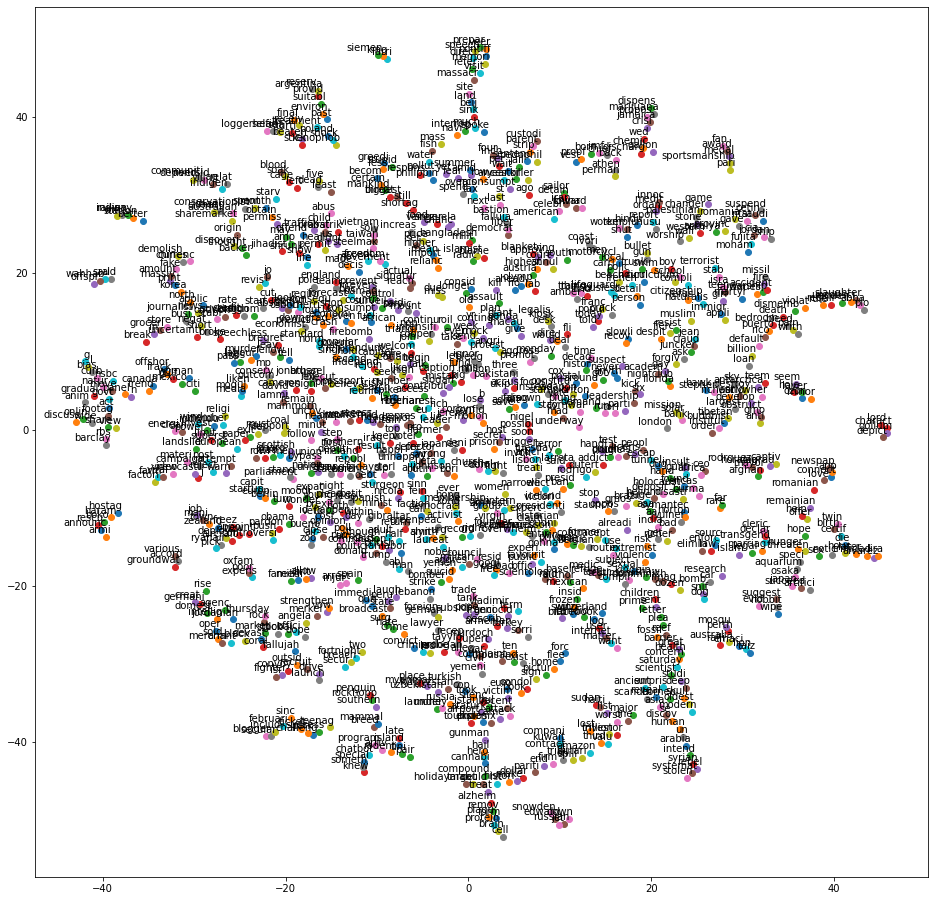

In [ ]:
tsne_plot(model)

In [ ]:
pip install pyvis

In [ ]:
from pyvis.network import Network

In [ ]:
nt = Network('1024px', '1024px')

In [ ]:
nt.from_nx(G)

In [ ]:
nt.show('nx4.html')